In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
ipc_path = "ipc.xlsx" # Modificar a ruta
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [3]:
Rmkt = market.diff().dropna()

In [4]:
Xall = Rmkt.drop("MEXBOL", axis=1)
Xall = Xall.join(Rmkt["MEXBOL"].shift(-1)).dropna()

X = Xall.drop("MEXBOL", axis=1)
y = Xall["MEXBOL"]

In [41]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1643)

In [94]:
Xall.shape, Xtrain.shape, Xtest.shape,  ytrain.shape, ytest.shape


((671, 36), (536, 35), (135, 35), (536,), (135,))

In [111]:
from numpy.random import uniform
alpha_list = uniform(0.0001, 10, 200)

In [140]:
params = {
    "lor__alpha": alpha_list,
    "lor__max_iter" : [3000]
    #"lor__normalize":[True, False]
}

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lor", Lasso())
])


In [141]:
gcv = GridSearchCV(pipe, params, scoring="r2",n_jobs=-1)

In [142]:
gcv.fit(Xtrain, ytrain)

/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lor',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              war...
       2.1

In [143]:
filt = gcv.best_estimator_.named_steps['lor'].coef_ > 1e-2

In [144]:
gcv.best_estimator_.named_steps['lor'].coef_

array([ -0.        ,   0.        ,   0.        ,   0.        ,
         1.43592045,   0.        ,  -0.        ,   0.        ,
        -5.16948468,   5.10845128,  -0.        ,   0.        ,
        -0.        ,   0.        ,   3.03583996,  -0.        ,
         0.        ,   0.        ,   0.        ,   5.26641757,
        -0.        ,  28.43193153,  -0.        ,   0.9286413 ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  10.31408408,  -0.        ,
         0.        ,  -0.        ,   7.81227988,  -0.        ,
        -0.        ,  -0.        ,   0.        ,  -1.19869491,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -6.14549805,   9.50213577,   0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -1.29763093,   0.        ,
        -0.        ,  -0.        ,  -7.39027041,   0.  

In [153]:
signif = gcv.best_estimator_.named_steps['lor'].coef_[filt]
len(signif)

110

In [146]:
gcv.best_estimator_.named_steps['lor'].intercept_

70.67232962093142

In [147]:
yhat = gcv.predict(Xtest)

In [148]:
mean_absolute_error(ytest, yhat)


320.2756189013295

In [149]:
r2_score(ytest,yhat)

-0.7687795638109423

In [150]:
gcv.best_params_

{'lor__alpha': 9.972326155107893, 'lor__max_iter': 3000}

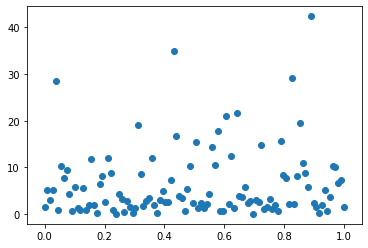

In [164]:
plt.scatter(np.linspace(0,1,len(signif)),signif, marker='o')